# Data Preprocessing

Import Libraries


In [1]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imageio

Function to Visualise Confusion Matrix

In [2]:
def visualiseConfusionMatrix(cnf_mat, header):
    import matplotlib.pyplot as plt
    import seaborn as sns

    class_labels = ['DF', 'F2F', 'FS', 'NT']
    sns.heatmap(cnf_mat, annot=True, cmap='Greens', fmt='d', annot_kws={"size": 20, "weight": "bold"}, xticklabels=class_labels, yticklabels=class_labels, linewidths=.05, linecolor="black")
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    for i in range(4):
        for j in range(4):
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor="black"))

    plt.title(header)
    name = 'VGG19_' + header + '.png'
    plt.savefig(name)
    files.download(name)

    plt.show()

Load the Dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Project/CSVs/features_vgg_19.csv')
X = dataset.iloc[ : , 2 : ].values
y = dataset.iloc[ : , 0 ].values
print(X)
print(y)

[[-5.11979250e+02 -1.44293640e+02  1.65813310e+01 ...  9.60431100e-02
   7.90819760e-01 -2.56042120e-01]
 [-5.11612400e+02 -1.44567640e+02  1.37931020e+01 ...  2.02273850e-01
   6.22268020e-02  2.07084940e-01]
 [-8.64845350e+01 -7.23580250e+01 -2.85846250e+02 ... -2.26418850e-01
   2.10443820e-01 -2.70626070e-01]
 ...
 [ 3.23090400e+02 -2.75059480e+02  2.45257460e+02 ... -4.04485230e-01
  -8.86172100e-03 -1.16170526e-01]
 [ 3.10678700e+02 -2.75875270e+02  2.58262850e+02 ... -4.43521320e-01
   1.35212540e-02  5.35857560e-01]
 [ 3.11118130e+02 -2.78083280e+02  2.57296780e+02 ...  4.72801450e-01
   9.26933900e-02 -5.24574040e-01]]
['NeuralTextures' 'NeuralTextures' 'NeuralTextures' ... 'Deepfakes'
 'Deepfakes' 'Deepfakes']


Split the dataset into training set and test set.

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

Initialise the 5-Fold Cross Validation

In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Support Vector Machine

Predict on Test Set.

In [6]:
poly_accuracy, rbf_accuracy = 0, 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    poly = svm.SVC(kernel='poly', degree=8, C=1).fit(X_train, y_train)
    rbf = svm.SVC(kernel='rbf', gamma=1, C=1).fit(X_train, y_train)
    
    poly_pred = poly.predict(X_test)
    rbf_pred = rbf.predict(X_test)
    
    poly_accuracy += accuracy_score(y_test, poly_pred)
    rbf_accuracy += accuracy_score(y_test, rbf_pred)


Outcomes.

Accuracy (Polynomial Kernel):  59.37 %
Accuracy (RBF Kernel):  21.88 %
F1 score (Polynomial Kernel):  59.79
F1 score (RBF Kernel):  8.06
Confusion Matrix (Polynomial Kernel): 
 [[53  1 37  2]
 [ 0 26 30 23]
 [ 0  0 77  0]
 [ 0  6 28 37]]
Confusion Matrix (RBF Kernel): 
 [[ 0  0  0 93]
 [ 0  0  0 79]
 [ 0  0  0 77]
 [ 0  0  0 71]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

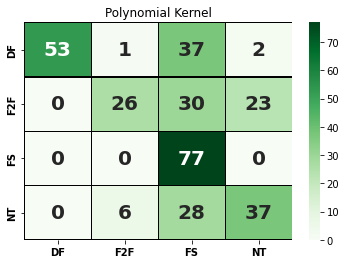

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

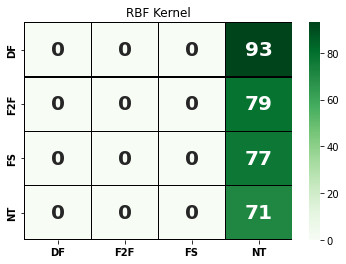

In [7]:
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy/5*100) + " %")
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy/5*100) + " %")

poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('F1 score (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('F1 score (RBF Kernel): ', "%.2f" % (rbf_f1*100))

print('Confusion Matrix (Polynomial Kernel): \n', confusion_matrix(y_test, poly_pred))
print('Confusion Matrix (RBF Kernel): \n',confusion_matrix(y_test, rbf_pred))
visualiseConfusionMatrix(confusion_matrix(y_test, poly_pred), 'Polynomial Kernel')
print()
visualiseConfusionMatrix(confusion_matrix(y_test, rbf_pred), 'RBF Kernel')


# Random Forest

Importing Libraries

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

Define the Classifier

In [9]:
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 42)

Predicting Test Set Results

In [10]:
rf_accuracy = 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    rf_accuracy += accuracy_score(y_test, y_pred)
    

Outcomes

Accuracy (Random Forest):  87.62 %
F1 (Random Forest):  90.19
Confustion Matrix (Random Forest):
 [[84  0  8  1]
 [ 2 60  3 14]
 [ 0  0 77  0]
 [ 2  1  0 68]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

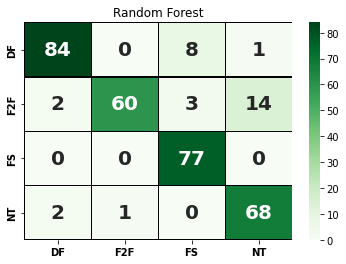

In [11]:
rf_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (Random Forest): ', "%.2f" % (rf_accuracy/5*100) + " %")
print('F1 (Random Forest): ', "%.2f" % (rf_f1*100))
print("Confustion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred))
visualiseConfusionMatrix(confusion_matrix(y_test, y_pred), 'Random Forest')

# MultiClass Logistic Regression

Import Libraries

In [12]:
from sklearn.linear_model import LogisticRegression

Define Classifier.

In [13]:
classifier = LogisticRegression(multi_class='auto', solver='sag')


Predicting Test Set Results.

In [14]:
lr_accuracy = 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    lr_accuracy += accuracy_score(y_test, y_pred)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Outcomes

Accuracy (Logistic Regression):  94.69 %
F1 (Logistic Regression):  93.44
Confusion Matrix (Logistic Regression):
 [[90  0  2  1]
 [ 1 68  0 10]
 [ 2  0 75  0]
 [ 0  5  0 66]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

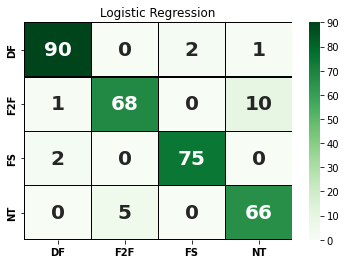

In [15]:
lr_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (Logistic Regression): ', "%.2f" % (lr_accuracy/5*100) + " %")
print('F1 (Logistic Regression): ', "%.2f" % (lr_f1*100))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred))
visualiseConfusionMatrix(confusion_matrix(y_test, y_pred), 'Logistic Regression')

# Decision Tree

Importing Libraries

In [16]:
from sklearn.tree import DecisionTreeClassifier

Define the Classifier

In [17]:
clf = DecisionTreeClassifier()

Predicting Test Set Results

In [18]:
dt_accuracy = 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    dt_accuracy += accuracy_score(y_test, y_pred)

Outcomes

Accuracy (Decision Tree):  64.31 %
F1 (Decision Tree):  61.41
Confustion Matrix (Decision Tree):
 [[61 13 15  4]
 [ 6 42  5 26]
 [ 9  6 56  6]
 [ 6 22  6 37]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

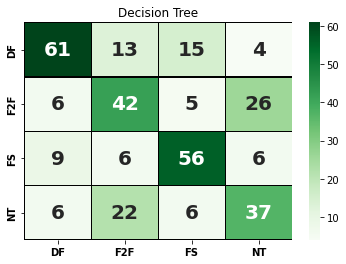

In [19]:
dt_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (Decision Tree): ', "%.2f" % (dt_accuracy/5*100) + " %")
print('F1 (Decision Tree): ', "%.2f" % (dt_f1*100))
print("Confustion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred))
visualiseConfusionMatrix(confusion_matrix(y_test, y_pred), 'Decision Tree')

# KNN

Importing Libraries

In [20]:
from sklearn.neighbors import KNeighborsClassifier

Define the Classifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=10)

Predicting Test Set Results

In [22]:
knn_accuracy = 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    knn_accuracy += accuracy_score(y_test, y_pred)

Outcomes

Accuracy (KNN):  70.62 %
F1 (KNN):  70.20
Confustion Matrix (KNN):
 [[79  5  9  0]
 [ 3 53  3 20]
 [18  5 53  1]
 [ 3 27  1 40]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

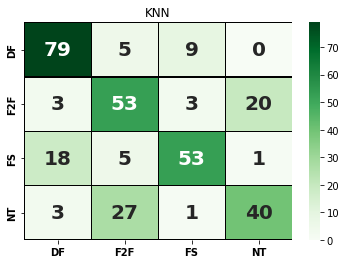

In [23]:
knn_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (KNN): ', "%.2f" % (knn_accuracy/5*100) + " %")
print('F1 (KNN): ', "%.2f" % (knn_f1*100))
print("Confustion Matrix (KNN):\n", confusion_matrix(y_test, y_pred))
visualiseConfusionMatrix(confusion_matrix(y_test, y_pred), 'KNN')